# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

## Rename Columns

In [3]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
train_data.rename(columns = {'battery_power':'battery_size',
                       'blue':'bluetooth_capable',
                       'clock_speed':'cpu_speed',
                       'dual_sim':'dual_sim_capable',
                       'fc':'front_camera_megapixels',
                       'four_g':'4G_capable',
                       'int_memory':'storage_space',
                       'm_dep':'phone_depth',
                       'mobile_wt':'phone_weight',
                       'n_cores':'cpu_cores',
                       'pc':'rear_camera_megapixels',
                       'px_height':'screen_height_pixels',
                       'px_width':'screen_width_pixels',
                       'ram':'ram',
                       'sc_h':'screen_height_cm',
                       'sc_w':'screen_width_cm',
                       'talk_time':'talk_time_hours',
                       'three_g':'3G_capable',
                       'touch_screen':'touch_screen',
                       'wifi':'wifi_capable',
                       'price_range':'price'},
            inplace = True)

In [5]:
train_data.columns

Index(['battery_size', 'bluetooth_capable', 'cpu_speed', 'dual_sim_capable',
       'front_camera_megapixels', '4G_capable', 'storage_space', 'phone_depth',
       'phone_weight', 'cpu_cores', 'rear_camera_megapixels',
       'screen_height_pixels', 'screen_width_pixels', 'ram',
       'screen_height_cm', 'screen_width_cm', 'talk_time_hours', '3G_capable',
       'touch_screen', 'wifi_capable', 'price'],
      dtype='object')

In [6]:
test_data.columns = train_data.columns

In [7]:
test_data.columns

Index(['battery_size', 'bluetooth_capable', 'cpu_speed', 'dual_sim_capable',
       'front_camera_megapixels', '4G_capable', 'storage_space', 'phone_depth',
       'phone_weight', 'cpu_cores', 'rear_camera_megapixels',
       'screen_height_pixels', 'screen_width_pixels', 'ram',
       'screen_height_cm', 'screen_width_cm', 'talk_time_hours', '3G_capable',
       'touch_screen', 'wifi_capable', 'price'],
      dtype='object')

# Inspect data

In [8]:
train_data.head()

,battery_size,bluetooth_capable,cpu_speed,dual_sim_capable,front_camera_megapixels,4G_capable,storage_space,phone_depth,phone_weight,cpu_cores,...,screen_height_pixels,screen_width_pixels,ram,screen_height_cm,screen_width_cm,talk_time_hours,3G_capable,touch_screen,wifi_capable,price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
test_data.head()

,battery_size,bluetooth_capable,cpu_speed,dual_sim_capable,front_camera_megapixels,4G_capable,storage_space,phone_depth,phone_weight,cpu_cores,...,screen_height_pixels,screen_width_pixels,ram,screen_height_cm,screen_width_cm,talk_time_hours,3G_capable,touch_screen,wifi_capable,price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [10]:
train_data.shape

(2000, 21)

In [11]:
test_data.shape

(1000, 21)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_size               2000 non-null int64
bluetooth_capable          2000 non-null int64
cpu_speed                  2000 non-null float64
dual_sim_capable           2000 non-null int64
front_camera_megapixels    2000 non-null int64
4G_capable                 2000 non-null int64
storage_space              2000 non-null int64
phone_depth                2000 non-null float64
phone_weight               2000 non-null int64
cpu_cores                  2000 non-null int64
rear_camera_megapixels     2000 non-null int64
screen_height_pixels       2000 non-null int64
screen_width_pixels        2000 non-null int64
ram                        2000 non-null int64
screen_height_cm           2000 non-null int64
screen_width_cm            2000 non-null int64
talk_time_hours            2000 non-null int64
3G_capable                 2000 non-null int64
touch_screen               2000 non-null in

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
battery_size               1000 non-null int64
bluetooth_capable          1000 non-null int64
cpu_speed                  1000 non-null int64
dual_sim_capable           1000 non-null float64
front_camera_megapixels    1000 non-null int64
4G_capable                 1000 non-null int64
storage_space              1000 non-null int64
phone_depth                1000 non-null int64
phone_weight               1000 non-null float64
cpu_cores                  1000 non-null int64
rear_camera_megapixels     1000 non-null int64
screen_height_pixels       1000 non-null int64
screen_width_pixels        1000 non-null int64
ram                        1000 non-null int64
screen_height_cm           1000 non-null int64
screen_width_cm            1000 non-null int64
talk_time_hours            1000 non-null int64
3G_capable                 1000 non-null int64
touch_screen               1000 non-null int

In [14]:
train_data.describe()

,battery_size,bluetooth_capable,cpu_speed,dual_sim_capable,front_camera_megapixels,4G_capable,storage_space,phone_depth,phone_weight,cpu_cores,...,screen_height_pixels,screen_width_pixels,ram,screen_height_cm,screen_width_cm,talk_time_hours,3G_capable,touch_screen,wifi_capable,price
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
test_data.describe()

,battery_size,bluetooth_capable,cpu_speed,dual_sim_capable,front_camera_megapixels,4G_capable,storage_space,phone_depth,phone_weight,cpu_cores,...,screen_height_pixels,screen_width_pixels,ram,screen_height_cm,screen_width_cm,talk_time_hours,3G_capable,touch_screen,wifi_capable,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


## No blank/null/nan values to manage

## No data types to change to become usable

## Look into each column's data

In [16]:
# There a few columns with data as 0 or 1
# I'm assuming 0 is False and 1 is True

for col in train_data.columns:
    print(train_data[col].value_counts())
    print()

1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_size, Length: 1094, dtype: int64

0    1010
1     990
Name: bluetooth_capable, dtype: int64

0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: cpu_speed, dtype: int64

1    1019
0     981
Name: dual_sim_capable, dtype: int64

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: front_camera_megapixels, dtype: int64

1    1043
0     957
Name: 4G_capable, dtype: int64

27    47
14    45
16    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: storag

## Visuals of each column's data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feff07c20d0>,
      dtype=object)

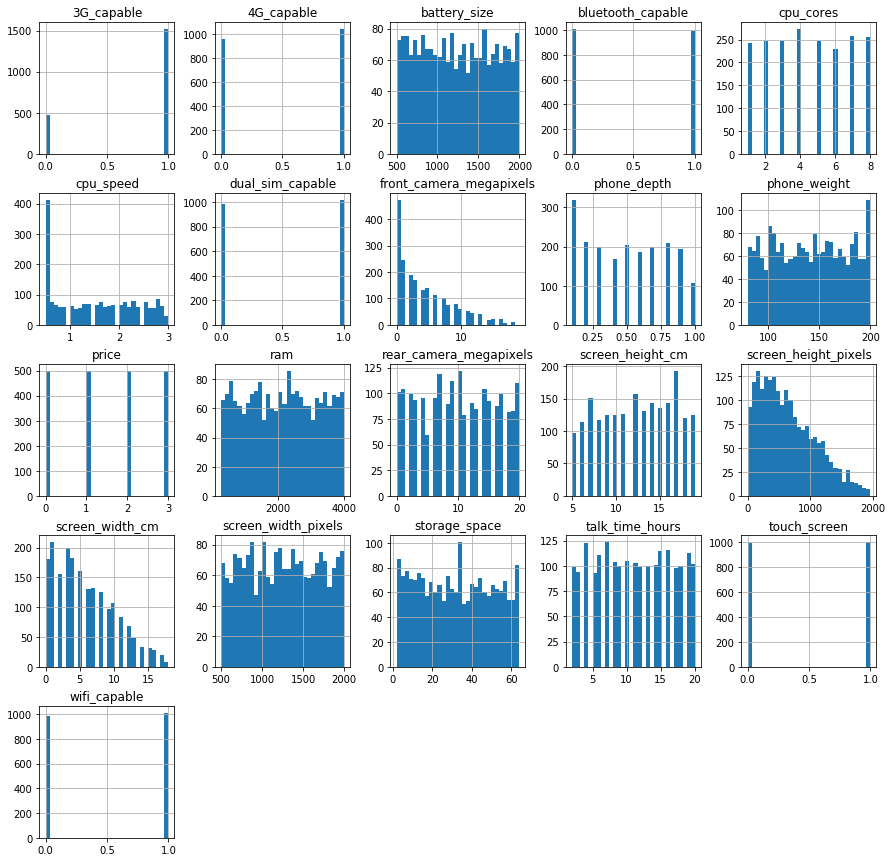

In [17]:
train_data.hist(bins=30, figsize=(15, 15))

## Feature correlations

AxesSubplot(0.125,0.125;0.62x0.755)


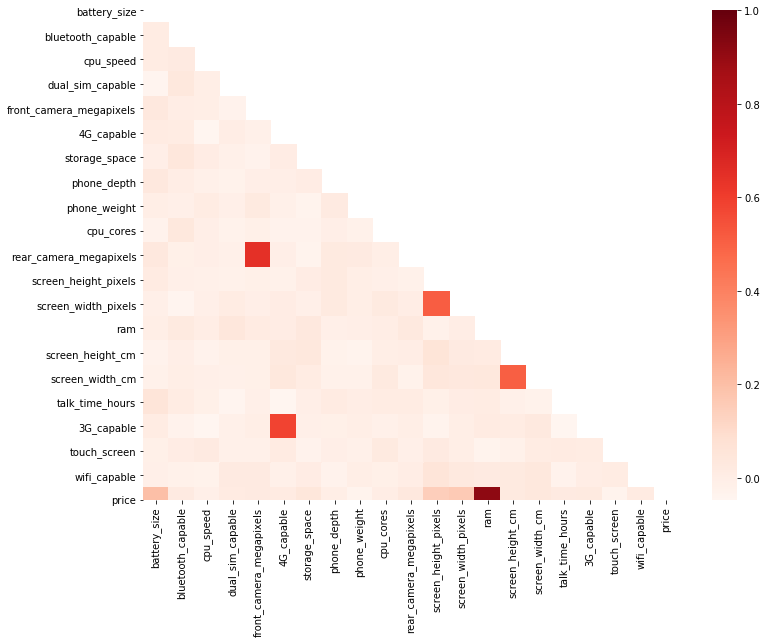

In [18]:
correlations = train_data.corr()
f, ax = plt.subplots(figsize = (12, 9))
mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap_one = sns.heatmap(correlations, cmap = 'Reds', mask = mask)
print(heatmap_one)

AxesSubplot(0.125,0.125;0.62x0.755)


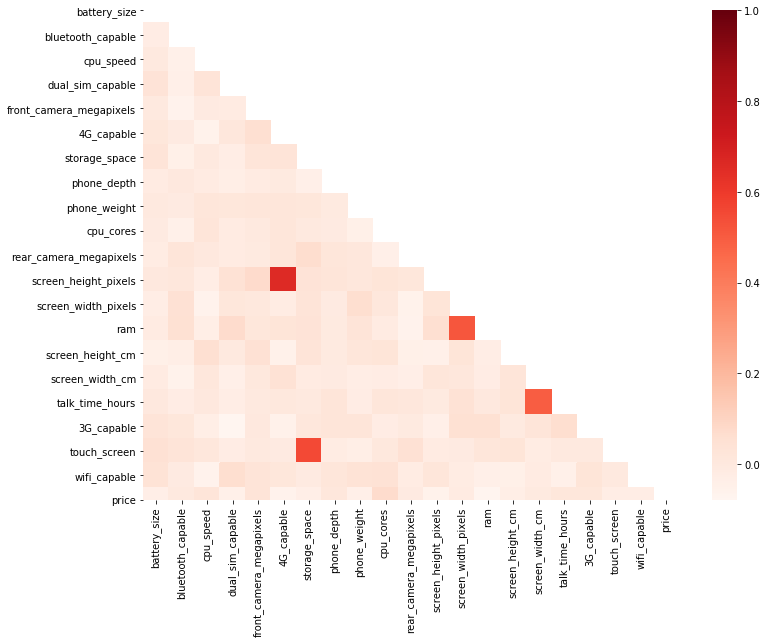

In [19]:
correlations = test_data.corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap_two = sns.heatmap(correlations, cmap = 'Reds', mask = mask)
print(heatmap_two)

In [20]:
corr = train_data.corr()

important_feature = corr['price'].sort_values(ascending = False).to_frame()
important_feature

,price
price,1.000000
ram,0.917046
battery_size,0.200723
screen_width_pixels,0.165818
screen_height_pixels,0.148858
storage_space,0.044435
screen_width_cm,0.038711
rear_camera_megapixels,0.033599
3G_capable,0.023611
screen_height_cm,0.022986


## Boxplot of 'Price' vs 'Battery Size'

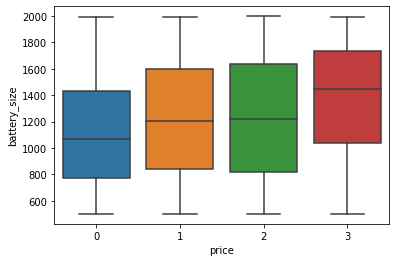

In [21]:
sns.boxplot(x = 'price', y = 'battery_size', data = train_data)

## Boxplot of 'Price' vs 'Talk Time'

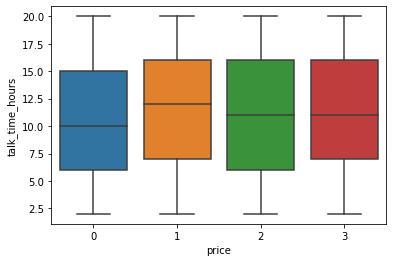

In [22]:
sns.boxplot(x = 'price', y = 'talk_time_hours', data = train_data)

## Kernel Density plot of 'price' vs 'phone weight'

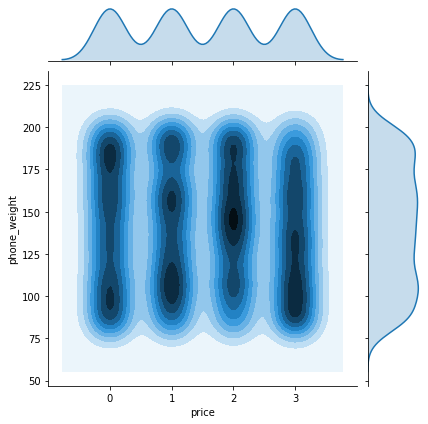

In [23]:
sns.jointplot(x = 'price', y = 'phone_weight', data = train_data, kind = 'kde')

## Kernel Density plot of 'price' vs 'ram'

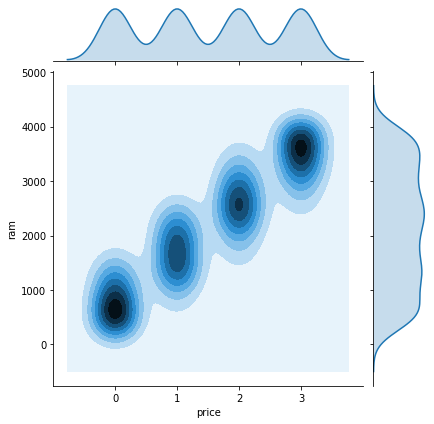

In [24]:
sns.jointplot(x = 'price', y = 'ram', data = train_data, kind = 'kde')

## Countplots of the 'price' column

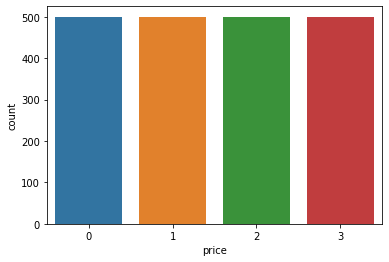

In [25]:
sns.countplot(data = train_data, x = 'price')

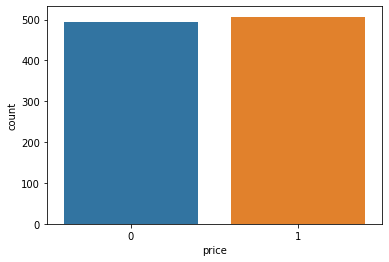

In [26]:
sns.countplot(data = test_data, x = 'price')

## Setting up the data x and y values

In [27]:
X = train_data.drop('price', axis=1)
y = train_data['price']

## Train, test, split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Accuracy score, confusion matrix, classification report

In [29]:
def print_metrics(y_test, y_pred):
    print('Accuracy Score is:', accuracy_score(y_test, y_pred) * 100)
    print()
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification report:')
    print(classification_report(y_test, y_pred))

## Initial modeling with various metrics

## Visualize test and pred data

In [30]:
# plt.scatter(y_test,y_pred)

Score:  0.9181733564712244
Mean absolute error:  0.26811527178304356


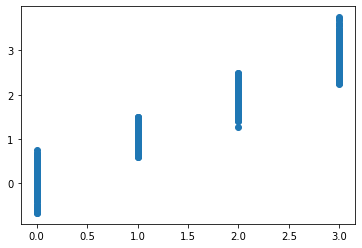

In [31]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg_y_pred = lin_reg.predict(X_test)

# print_metrics(y_test, y_pred)
print("Score: ", lin_reg.score(X_test,y_test))

print("Mean absolute error: ", mean_absolute_error(y_test, lin_reg_y_pred))

plt.scatter(y_test,lin_reg_y_pred)

Score:  0.7883333333333333
Mean absolute error:  0.21333333333333335
Accuracy Score is: 78.83333333333333

Confusion matrix:
[[143   7   1   0]
 [ 11  98  37   0]
 [  0  34  83  31]
 [  0   0   6 149]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       151
           1       0.71      0.67      0.69       146
           2       0.65      0.56      0.60       148
           3       0.83      0.96      0.89       155

    accuracy                           0.79       600
   macro avg       0.78      0.79      0.78       600
weighted avg       0.78      0.79      0.78       600



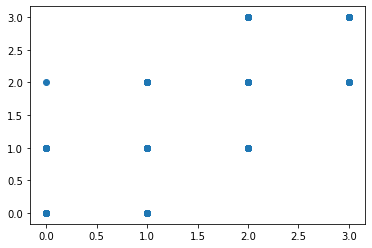

In [32]:
log_reg = LogisticRegression(random_state = 42, solver = 'liblinear').fit(X_train, y_train)
log_reg_y_pred = log_reg.predict(X_test)

print("Score: ", log_reg.score(X_test,y_test))

print("Mean absolute error: ", mean_absolute_error(y_test, log_reg_y_pred))

print_metrics(y_test, log_reg_y_pred)

plt.scatter(y_test,log_reg_y_pred)

## Logistic Regression coefficients

Feature: battery_size, Score: -0.00300
Feature: bluetooth_capable, Score: 0.23668
Feature: cpu_speed, Score: 0.60488
Feature: dual_sim_capable, Score: 0.55869
Feature: front_camera_megapixels, Score: -0.04203
Feature: 4G_capable, Score: 0.09150
Feature: storage_space, Score: 0.00558
Feature: phone_depth, Score: 0.61195
Feature: phone_weight, Score: 0.02210
Feature: cpu_cores, Score: 0.16572
Feature: rear_camera_megapixels, Score: 0.05170
Feature: screen_height_pixels, Score: -0.00244
Feature: screen_width_pixels, Score: -0.00114
Feature: ram, Score: -0.00640
Feature: screen_height_cm, Score: 0.13060
Feature: screen_width_cm, Score: -0.01131
Feature: talk_time_hours, Score: 0.05571
Feature: 3G_capable, Score: 0.35411
Feature: touch_screen, Score: 0.62696
Feature: wifi_capable, Score: 0.31180


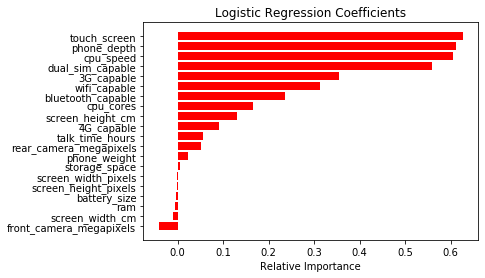

In [33]:
coeff = log_reg.coef_[0]
cols = train_data.columns
indices = np.argsort(coeff)

for i, v in enumerate(coeff):
	print('Feature: %s, Score: %.5f' % (cols[i], v))
    
plt.title('Logistic Regression Coefficients')
plt.barh(range(len(indices)), coeff[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)), [cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Score:  0.24333333333333335
Mean absolute error:  1.015
Accuracy Score is: 24.333333333333336

Confusion matrix:
[[  0 151   0   0]
 [  0 146   0   0]
 [  0 148   0   0]
 [  0 155   0   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.24      1.00      0.39       146
           2       0.00      0.00      0.00       148
           3       0.00      0.00      0.00       155

    accuracy                           0.24       600
   macro avg       0.06      0.25      0.10       600
weighted avg       0.06      0.24      0.10       600



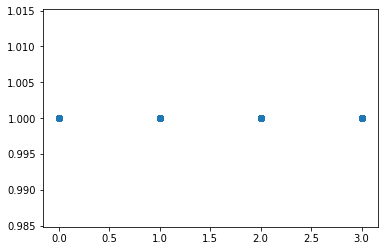

In [34]:
sc = SVC(random_state = 42).fit(X_train, y_train)
sc_y_pred = sc.predict(X_test)

print("Score: ", sc.score(X_test,y_test))

print("Mean absolute error: ", mean_absolute_error(y_test, sc_y_pred))

print_metrics(y_test, sc_y_pred)

plt.scatter(y_test,sc_y_pred)

Score:  0.9183333333333333
Mean absolute error:  0.08166666666666667
Accuracy Score is: 91.83333333333333

Confusion matrix:
[[145   6   0   0]
 [  6 135   5   0]
 [  0  12 127   9]
 [  0   0  11 144]]

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.88      0.92      0.90       146
           2       0.89      0.86      0.87       148
           3       0.94      0.93      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



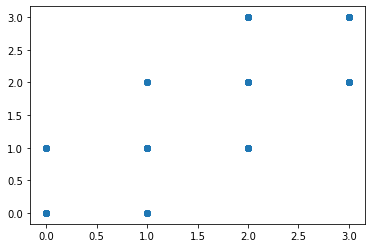

In [35]:
knc = KNeighborsClassifier().fit(X_train, y_train)
knc_y_pred = knc.predict(X_test)

print("Score: ", knc.score(X_test,y_test))

print("Mean absolute error: ", mean_absolute_error(y_test, knc_y_pred))

print_metrics(y_test, knc_y_pred)

plt.scatter(y_test,knc_y_pred)

Score:  0.8666666666666667
Mean absolute error:  0.13333333333333333
Accuracy Score is: 86.66666666666667

Confusion matrix:
[[144   7   0   0]
 [ 10 119  17   0]
 [  0  20 116  12]
 [  0   0  14 141]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.82      0.82       146
           2       0.79      0.78      0.79       148
           3       0.92      0.91      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



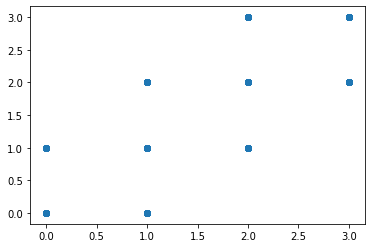

In [36]:
rf = RandomForestClassifier(random_state = 42, n_estimators = 100).fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

print("Score: ", rf.score(X_test,y_test))

print("Mean absolute error: ", mean_absolute_error(y_test, rf_y_pred))

print_metrics(y_test, rf_y_pred)

plt.scatter(y_test,rf_y_pred)

Score:  0.7833333333333333
Mean absolute error:  0.21666666666666667
Accuracy Score is: 78.33333333333333

Confusion matrix:
[[134  17   0   0]
 [ 14 114  18   0]
 [  0  22 120   6]
 [  0   0  53 102]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.75      0.78      0.76       146
           2       0.63      0.81      0.71       148
           3       0.94      0.66      0.78       155

    accuracy                           0.78       600
   macro avg       0.81      0.78      0.79       600
weighted avg       0.81      0.78      0.79       600



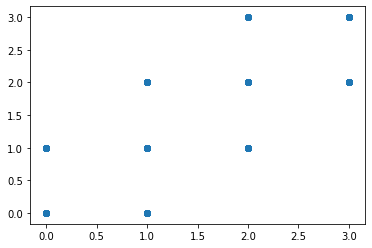

In [37]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)

print("Score: ", ada.score(X_test,y_test))

print("Mean absolute error: ", mean_absolute_error(y_test, ada_y_pred))

print_metrics(y_test, ada_y_pred)

plt.scatter(y_test,ada_y_pred)

Score:  0.8866666666666667
Mean absolute error:  0.11333333333333333
Accuracy Score is: 88.66666666666667

Confusion matrix:
[[141  10   0   0]
 [  7 129  10   0]
 [  0  13 122  13]
 [  0   0  15 140]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.85      0.88      0.87       146
           2       0.83      0.82      0.83       148
           3       0.92      0.90      0.91       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



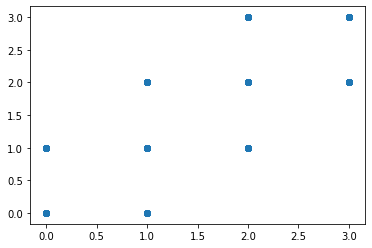

In [38]:
gbc = GradientBoostingClassifier(random_state = 42).fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)

print("Score: ", gbc.score(X_test,y_test))

print("Mean absolute error: ", mean_absolute_error(y_test, gbc_y_pred))

print_metrics(y_test, gbc_y_pred)

plt.scatter(y_test,gbc_y_pred)

## Function to visualize different models' feature importances

In [39]:
def feature_imp_viz(model):
    features = train_data.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    model_name = 'model_name'
    
    if model == rf:
        model_name = 'Random Forest'
    elif model == ada:
        model_name = 'Linear Regression'
    else:
        model_name = 'Gradient Boost'
    
    print('*' * 60)
    
    for i, v in enumerate(importances):
        print('Feature: %s, Score: %.5f' % (features[i], v))
    
    plt.title(model_name + ' Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

## Visualize different models' feature importances

************************************************************
Feature: battery_size, Score: 0.07373
Feature: bluetooth_capable, Score: 0.00728
Feature: cpu_speed, Score: 0.03039
Feature: dual_sim_capable, Score: 0.00768
Feature: front_camera_megapixels, Score: 0.02731
Feature: 4G_capable, Score: 0.00697
Feature: storage_space, Score: 0.04038
Feature: phone_depth, Score: 0.02460
Feature: phone_weight, Score: 0.04015
Feature: cpu_cores, Score: 0.02399
Feature: rear_camera_megapixels, Score: 0.03105
Feature: screen_height_pixels, Score: 0.05774
Feature: screen_width_pixels, Score: 0.05947
Feature: ram, Score: 0.45810
Feature: screen_height_cm, Score: 0.02948
Feature: screen_width_cm, Score: 0.02997
Feature: talk_time_hours, Score: 0.03085
Feature: 3G_capable, Score: 0.00639
Feature: touch_screen, Score: 0.00704
Feature: wifi_capable, Score: 0.00742


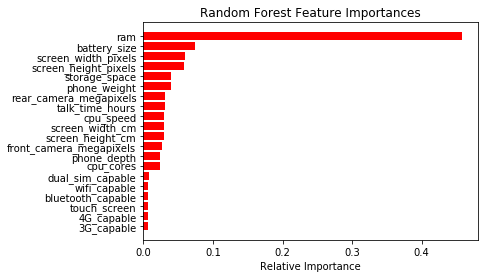

************************************************************
Feature: battery_size, Score: 0.12000
Feature: bluetooth_capable, Score: 0.00000
Feature: cpu_speed, Score: 0.00000
Feature: dual_sim_capable, Score: 0.00000
Feature: front_camera_megapixels, Score: 0.00000
Feature: 4G_capable, Score: 0.00000
Feature: storage_space, Score: 0.00000
Feature: phone_depth, Score: 0.02000
Feature: phone_weight, Score: 0.02000
Feature: cpu_cores, Score: 0.00000
Feature: rear_camera_megapixels, Score: 0.02000
Feature: screen_height_pixels, Score: 0.14000
Feature: screen_width_pixels, Score: 0.08000
Feature: ram, Score: 0.56000
Feature: screen_height_cm, Score: 0.00000
Feature: screen_width_cm, Score: 0.00000
Feature: talk_time_hours, Score: 0.02000
Feature: 3G_capable, Score: 0.00000
Feature: touch_screen, Score: 0.00000
Feature: wifi_capable, Score: 0.02000


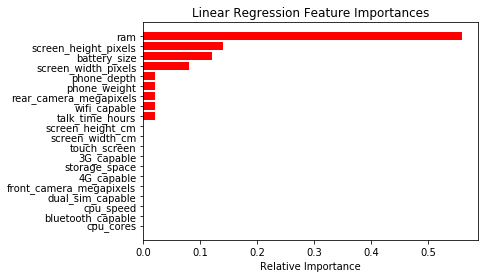

************************************************************
Feature: battery_size, Score: 0.11282
Feature: bluetooth_capable, Score: 0.00008
Feature: cpu_speed, Score: 0.00017
Feature: dual_sim_capable, Score: 0.00006
Feature: front_camera_megapixels, Score: 0.00146
Feature: 4G_capable, Score: 0.00023
Feature: storage_space, Score: 0.00417
Feature: phone_depth, Score: 0.00294
Feature: phone_weight, Score: 0.00586
Feature: cpu_cores, Score: 0.00081
Feature: rear_camera_megapixels, Score: 0.00056
Feature: screen_height_pixels, Score: 0.04920
Feature: screen_width_pixels, Score: 0.02783
Feature: ram, Score: 0.78989
Feature: screen_height_cm, Score: 0.00100
Feature: screen_width_cm, Score: 0.00111
Feature: talk_time_hours, Score: 0.00092
Feature: 3G_capable, Score: 0.00000
Feature: touch_screen, Score: 0.00023
Feature: wifi_capable, Score: 0.00068


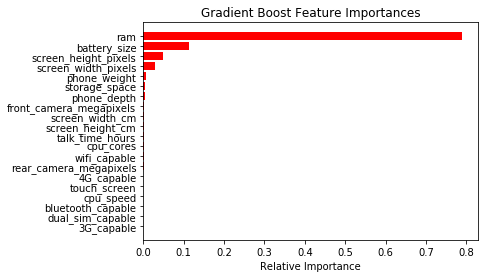

In [40]:
models = [rf, ada, gbc]
for model in models:
    feature_imp_viz(model)

## Feature Importances with Chi-Squared

In [41]:
# Apply SelectKBest class to extract all feature importances (k = 'all')
top_features = SelectKBest(score_func = chi2, k = 'all')
top_features.fit(X, y)
scores = pd.DataFrame(top_features.scores_)
columns = pd.DataFrame(X.columns)

# Concat two df for better visualization 
top_scores = pd.concat([columns, scores], axis = 1)
top_scores.columns = ['Feature Name', 'Score']
print(top_scores.nlargest(15, 'Score'))

               Feature Name          Score
13                      ram  931267.519053
11     screen_height_pixels   17363.569536
0              battery_size   14129.866576
12      screen_width_pixels    9810.586750
8              phone_weight      95.972863
6             storage_space      89.839124
15          screen_width_cm      16.480319
16          talk_time_hours      13.236400
4   front_camera_megapixels      10.135166
14         screen_height_cm       9.614878
10   rear_camera_megapixels       9.186054
9                 cpu_cores       9.097556
18             touch_screen       1.928429
5                4G_capable       1.521572
7               phone_depth       0.745820


## Initial round of modeling and metrics (without individual running cells)

SVC

Accuracy Score: 24.333333333333336

Confusion Matrix:
[[  0 151   0   0]
 [  0 146   0   0]
 [  0 148   0   0]
 [  0 155   0   0]]

AxesSubplot(0.125,0.125;0.62x0.755)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.24      1.00      0.39       146
           2       0.00      0.00      0.00       148
           3       0.00      0.00      0.00       155

    accuracy                           0.24       600
   macro avg       0.06      0.25      0.10       600
weighted avg       0.06      0.24      0.10       600

KNeighborsClassifier

Accuracy Score: 91.83333333333333

Confusion Matrix:
[[145   6   0   0]
 [  6 135   5   0]
 [  0  12 127   9]
 [  0   0  11 144]]

AxesSubplot(0.125,0.125;0.62x0.755)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.88      0.92      0.90   

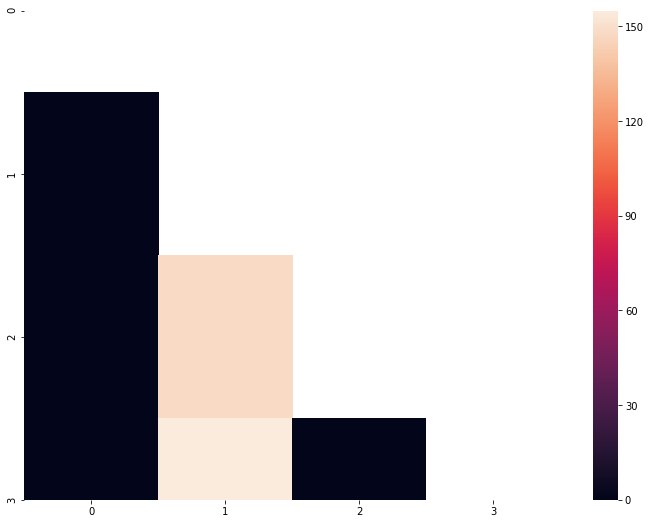

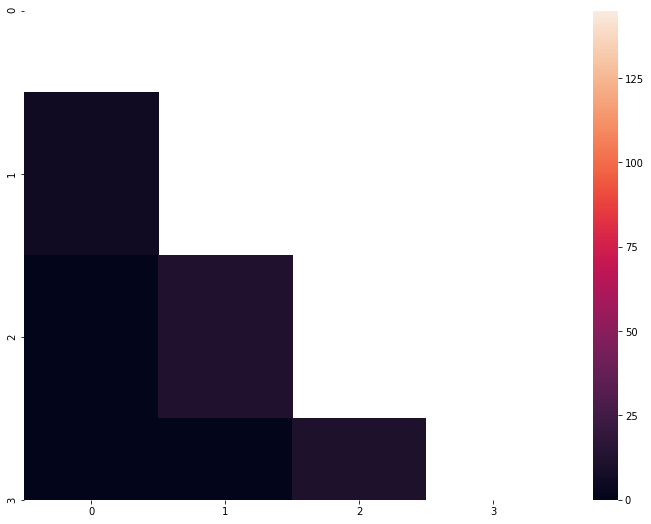

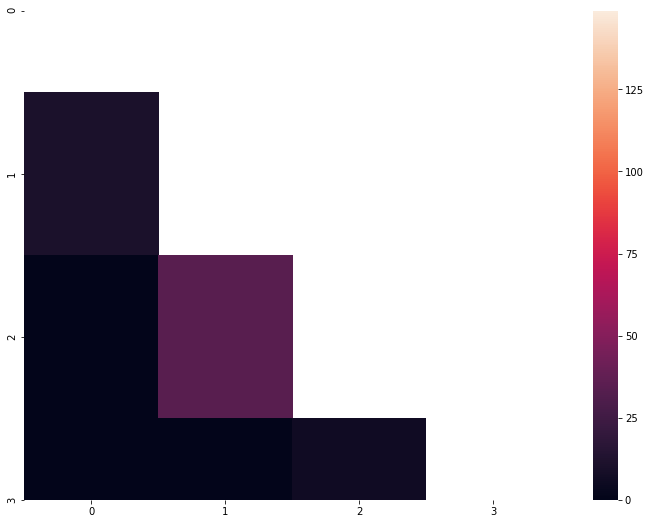

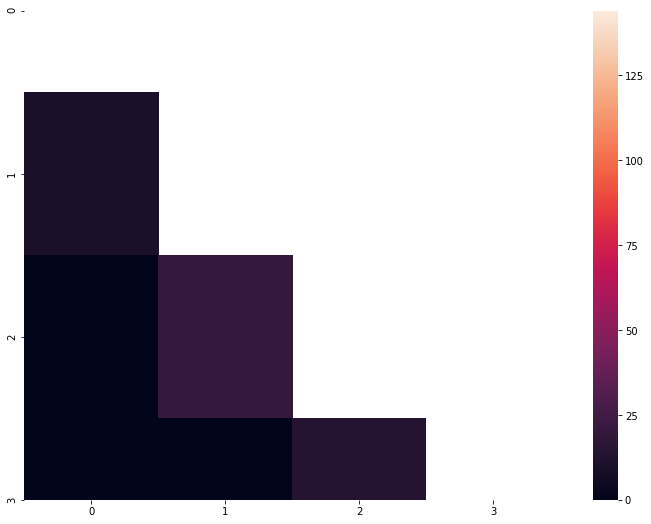

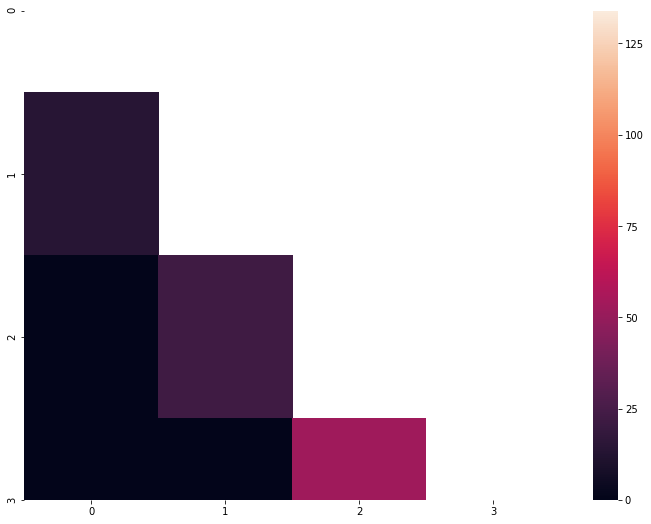

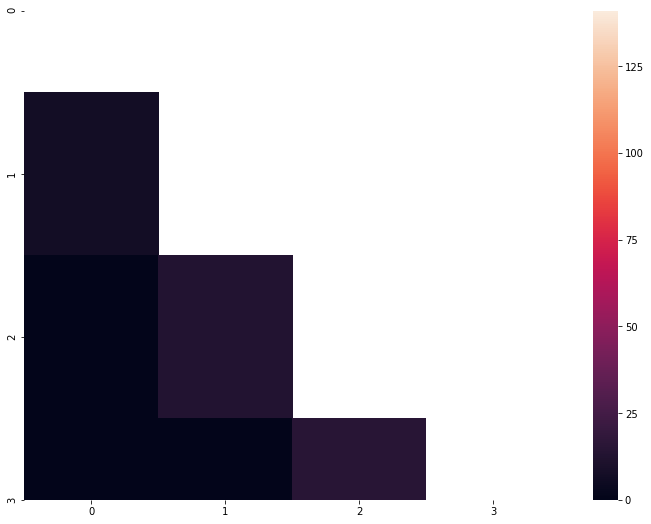

In [64]:
# Testing these models with default settings and printing out various metrics/results for each
# SVC, KNeighborsClassifier, LogisticRegression, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

classifiers = [SVC(random_state = 42),
               KNeighborsClassifier(),
               LogisticRegression(random_state = 42, solver = 'liblinear'),
               RandomForestClassifier(random_state = 42, n_estimators = 100),
               AdaBoostClassifier(random_state = 42),
               GradientBoostingClassifier(random_state = 42)]

for clfs in classifiers:
    clfs.fit(X_train, y_train)
    name = clfs.__class__.__name__
    y_pred = clfs.predict(X_test)
    print("=" * 60)
    print(name)
    print()
    print('Accuracy Score:', accuracy_score(y_test, y_pred) * 100)
    print()
    print('Confusion Matrix:')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print()

    # visuals of the confusion matrices shown as heatmaps
    f, ax = plt.subplots(figsize = (12, 9))

    mask = np.zeros_like(conf_matrix, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True

    heatmaps = sns.heatmap(conf_matrix, mask = mask)
    print(heatmaps)

    print()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

## Top 3 Models

In [43]:
classifiers = [KNeighborsClassifier(),
               GradientBoostingClassifier(random_state = 42)]

for clfs in classifiers:
    clfs.fit(X_train, y_train)
    name = clfs.__class__.__name__
    y_pred = clfs.predict(X_test)
    print("=" * 60)
    print(name)
    print()
    print('Accuracy Score:', accuracy_score(y_test, y_pred) * 100)
    print()
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

print("=" * 60)
print("Linear Regression score: ", lin_reg.score(X_test, y_test))
print("=" * 60)

KNeighborsClassifier

Accuracy Score: 91.83333333333333

Confusion Matrix:
[[145   6   0   0]
 [  6 135   5   0]
 [  0  12 127   9]
 [  0   0  11 144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       151
           1       0.88      0.92      0.90       146
           2       0.89      0.86      0.87       148
           3       0.94      0.93      0.94       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

GradientBoostingClassifier

Accuracy Score: 88.66666666666667

Confusion Matrix:
[[141  10   0   0]
 [  7 129  10   0]
 [  0  13 122  13]
 [  0   0  15 140]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.85      0.88      0.87       146
           2       0.83      0.82      0.83 

## 10 Fold Cross Validation - Optimizing for F1-Score

In [44]:
# # classifier = [KNeighborsClassifier(n_jobs = -1),
# #               RandomForestClassifier(n_jobs = -1),
# #               GradientBoostingClassifier()]

# classifier = [RandomForestClassifier(n_jobs = -1)]

# knc_grid = {
#     'n_neighbors' : [None, 5, 10, 20, 40],
#     'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size' : [None, 5, 10, 20, 30, 50],
#     'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
# }

# rfc_grid = {
#     'n_estimators' : [50, 75, 100, 125, 150],
#     'max_depth' : [None, 25, 50, 75, 100],
#     'min_samples_split' : [2, 4, 6, 8, 10],
#     'random_state' : [42]
# }
# #     'criterion' : ['gini', 'entropy'],

# gbc_grid = {
#     'loss' : ['deviance', 'exponential'],
#     'n_estimators' : [50, 75, 100, 125, 150],
#     'criterion' : ['friedman_mse', 'mse', 'mae'],
#     'max_depth' : [None, 3, 6, 12, 24],
#     'min_samples_split' : [2, 4, 6, 8, 10],
#     'max_features' : [None, 'auto', 'sqrt', 'log2'],
#     'random_state' : [42]
# }

# # param_grid_list = [knc_grid, rfc_grid, gbc_grid]
# param_grid_list = [rfc_grid]

# i = 0
# for clf in classifier:

#     gscv = GridSearchCV(estimator = clf, param_grid = param_grid_list[i], scoring = None, cv = 10)
#     gscv.fit(X_train, y_train)
#     i += 1

#     print('Model name:', clf.__class__.__name__)
#     print()
#     print('Best params:', gscv.best_params_)
#     print()
#     y_pred = gscv.predict(X_test)
#     print('10 Fold Cross Validation Accuracy Score:', gscv.score(X_test, y_test) * 100)
#     print()
#     print('Optimized F1-Score:', f1_score(y_test, y_pred) * 100)
#     print()
#     print('Confusion matrix:')
#     print(confusion_matrix(y_test, y_pred))
#     print()
#     print('Classification report:')
#     print(classification_report(y_test, y_pred))
#     print('=' * 60)